In [11]:
import Pkg
Pkg.add("MetaGraphs")
Pkg.add("LightGraphs")
Pkg.add("Compose")
Pkg.add("GraphPlot")

  Resolving package versions...
No Changes to `C:\Users\xgodw\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\xgodw\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\xgodw\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\xgodw\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\xgodw\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\xgodw\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\xgodw\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\xgodw\.julia\environments\v1.5\Manifest.toml`


In [2]:
using DelimitedFiles
using LightGraphs
using MetaGraphs
using Compose
using GraphPlot

In [3]:
"""
    kep_pool

Contruct a pool from a `.wmd` and a `.dat` files from PrefLib.
    
# Parameters
* `wmd_file::String` : Absolute path of the `.wmd` file.
* `dat_file::String` : Absolute path of the `.dat` file.
"""
function kep_pool(wmd_file::String, dat_file::String)
    
    wmd_file_name = split(split(wmd_file, '/')[end], '.')[1]
    dat_file_name = split(split(dat_file, '/')[end], '.')[1]

    wmd_file_name == dat_file_name || throw(ArgumentError(".wmd and .dat files do not correspond to the same dataset."))
    isfile(wmd_file) || throw(ArgumentError(".wmd file not found."))
    isfile(dat_file) || throw(ArgumentError(".dat file not found."))

    # Extract the graph structure from the .wmd file using a MetaGraph
    file = readdlm(wmd_file, '\n')
    V = parse(Int, split(file[1],',')[1])
    
    # Create a directed metagraph with nodes V and inital edge weights 0 
    pool = MetaDiGraph(V, 0)
    for line in file[2:end]
        splitted_line = split(line, ',')
        if length(splitted_line) == 3
            # /!\ Pairs are numbered from 0 in the second part of the file
            source = parse(Int, splitted_line[1]) + 1
            destination = parse(Int, splitted_line[2]) + 1
            weight = parse(Int, splitted_line[3])
            # Create an arc with given source and destination
            add_edge!(pool, source, destination)
            # Set its weight property
            set_prop!(pool, source, destination, :weight, weight)
        end
    end

    # SOME INFORMATION THAT CAN BE USEFUL BUT NOT NECESSARY FOR THE PROJECT
    # Extract meta information from the .dat file
#     file = readdlm(dat_file, '\n')
#     for line in file[2:end]
#         splitted_line = split(line, ',')
#         pair = parse(Int, splitted_line[1])
#         set_prop!(pool, pair, :donor, splitted_line[2])
#         set_prop!(pool, pair, :patient, splitted_line[3])
#         set_prop!(pool, pair, :wifep, parse(Bool, splitted_line[4]))
#         set_prop!(pool, pair, :pra, parse(Float64, splitted_line[5]))
#         set_prop!(pool, pair, :altruist, parse(Bool, splitted_line[7]))
#     end
#     Va = [v for v in vertices(pool) if get_prop(pool, v, :altruist)]
#     set_prop!(pool, :nb_altruist, length(Va))

    return pool

end

kep_pool

In [8]:
data_folder = string(@__DIR__,"/data")
instance = "MD-00001-00000193"
wmd_file = joinpath(data_folder, join([instance, ".wmd"]))
dat_file = joinpath(data_folder, join([instance, ".dat"]))
pool = kep_pool(wmd_file, dat_file)

{16, 47} directed Int64 metagraph with Int64 weights defined by :weight (default weight 0)

In [9]:
"Number of vertices in the pool is: $(nv(pool))"

"Number of vertices in the pool is: 16"

In [10]:
"Number of vertices in the pool is: $(ne(pool))"

"Number of vertices in the pool is: 47"

In [11]:
weights = [get_prop(pool, arc, :weight) for arc in edges(pool)]

47-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [7]:
#for (ind,arc) in enumerate(edges(pool))
#    if(ind in [47,79,154,232,243])
#        println("There is an arc going from node $(arc.src) to $(arc.dst). It is: ",arc)
#    end
#end

There is an arc going from node 4 to 29. It is: Edge 4 => 29
There is an arc going from node 9 to 16. It is: Edge 9 => 16
There is an arc going from node 16 to 9. It is: Edge 16 => 9
There is an arc going from node 29 to 32. It is: Edge 29 => 32
There is an arc going from node 32 to 4. It is: Edge 32 => 4


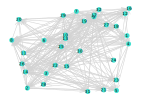

In [9]:
gplot(pool,layout = random_layout,nodelabel = collect(1:nv(pool)))